<a href="https://colab.research.google.com/github/Stronglight0627/PilGi/blob/main/Callback%2CEarlystopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target)=keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0, validation_data=(val_scaled, val_target))

#모델저장
model.save_weights('model-weights.h5')
model.save('model-whole.h5')

!ls -al *.h5


4431872/4422102 [==============================] - 0s 0us/step
-rw-r--r-- 1 root root 333272 Aug 17 01:34 model-weights.h5
-rw-r--r-- 1 root root 982568 Aug 17 01:34 model-whole.h5


In [3]:
#파라미터복원
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')
model.evaluate(val_scaled, val_target)


375/375 [==============================] - 1s 1ms/step - loss: 0.3491 - accuracy: 0.8768


[0.34906619787216187, 0.8768333196640015]

In [4]:
#모델전체를 복원
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3491 - accuracy: 0.8768


[0.34906619787216187, 0.8768333196640015]

In [7]:
#콜백
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)

model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])



Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5936 - accuracy: 0.7912 - val_loss: 0.4209 - val_accuracy: 0.8466
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4419 - accuracy: 0.8406 - val_loss: 0.3787 - val_accuracy: 0.8641
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4034 - accuracy: 0.8532 - val_loss: 0.3697 - val_accuracy: 0.8630
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3841 - accuracy: 0.8606 - val_loss: 0.3514 - val_accuracy: 0.8719
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3707 - accuracy: 0.8657 - val_loss: 0.3713 - val_accuracy: 0.8636
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3558 - accuracy: 0.8702 - val_loss: 0.3669 - val_accuracy: 0.8665
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3432 - accuracy: 0.8731 - val_loss: 0.3286 - val_accuracy:

In [8]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3491 - accuracy: 0.8768


[0.34906619787216187, 0.8768333196640015]

In [9]:
#earlystopping

model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history=model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb,early_stopping_cb])



Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5868 - accuracy: 0.7932 - val_loss: 0.4393 - val_accuracy: 0.8397
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4377 - accuracy: 0.8425 - val_loss: 0.3765 - val_accuracy: 0.8627
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4007 - accuracy: 0.8543 - val_loss: 0.3708 - val_accuracy: 0.8638
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3828 - accuracy: 0.8619 - val_loss: 0.3519 - val_accuracy: 0.8708
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3686 - accuracy: 0.8647 - val_loss: 0.3437 - val_accuracy: 0.8761
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3522 - accuracy: 0.8712 - val_loss: 0.3437 - val_accuracy: 0.8737
Epoch 7/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3432 - accuracy: 0.8747 - val_loss: 0.3308 - val_accuracy:

In [10]:
print(early_stopping_cb.stopped_epoch)

9


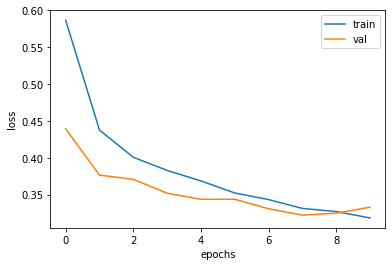

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [12]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3221 - accuracy: 0.8827


[0.32214102149009705, 0.8826666474342346]

In [16]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3221 - accuracy: 0.8827


[0.32214102149009705, 0.8826666474342346]

In [17]:
!ls -al *.h5

-rw-r--r-- 1 root root 982664 Aug 17 01:49 best-model.h5
-rw-r--r-- 1 root root 333272 Aug 17 01:34 model-weights.h5
-rw-r--r-- 1 root root 982568 Aug 17 01:34 model-whole.h5
